In [1]:
from utils import is_same_crash, match_existing_crash
from capture_process import Capture, combine_histogram
from pprint import pprint

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")



--------------------- State Machine ---------------------
[Machine] Global Config Loaded: global_config.json
[Machine] Final Config Loaded: /home/user/wdissector/configs/bt_config.json
Disabling Core dump for this process: ulimit -c 0
WDissector Lib (Wireshark) 4.1.0 (v4.1.0rc0-673-g3baf3216acca)
Profile "WDissector" loaded
[Machine] Mapping Rules loaded: 9
[Machine] --> "btsdp"
[Machine] --> "bta2dp"
[Machine] --> "btavrcp"
[Machine] --> "btavdtp"
[Machine] --> "btrfcomm"
[Machine] --> "btl2cap"
[Machine] --> "btbrlmp.op == 3"
[Machine] --> "esp32_btlmp"
[Machine] --> "fhs"
[Machine] Exclusion Rules loaded: 4
[Machine] Event loop started
[Machine] Global Config Loaded: global_config.json
[Machine] Final Config Loaded: /home/user/wdissector/bindings/python/configs/bt_config.json
WDissector Lib (Wireshark) 4.1.0 (v4.1.0rc0-673-g3baf3216acca)
Profile "WDissector" loaded
[Machine] Mapping Rules loaded: 9
[Machine] --> "btsdp"
[Machine] --> "bta2dp"
[Machine] --> "btavrcp"
[Machine] --> 

In [2]:
def analyze_capture(capture: Capture):
    print("Analyze capture file in", capture.path)
    # basic information of the capture
    print("Total crashes:", len(capture.crashes))
    combined_histogram = combine_histogram(capture, 2000)
    print("Unique crashes:", len(combined_histogram))

In [12]:
capture = Capture(
    "/home/user/wdissector/modules/auto-exploiter/captures/new_ref_mut/capture_bluetooth.pcapng",
    "bt",
    9999,
    False,
)
analyze_capture(capture)

print(combine_histogram(capture, 2000))
for unique_crash in combine_histogram(capture, 2000):
    for reason in unique_crash["reasons"]:
        matched_existing_reason = match_existing_crash(reason)
        if matched_existing_reason is not None:
            print(matched_existing_reason, unique_crash["num_crashes"], reason)
            break

 ** (wdissector:4170111) 09:00:20.398752 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 535779: plugins/epan/h4bcm/packet-btbrlmp.c:2787: failed assertion "len == 2"
 ** (wdissector:4170111) 09:00:20.400953 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 535825: plugins/epan/h4bcm/packet-btbrlmp.c:2678: failed assertion "len == 17"
 ** (wdissector:4170111) 09:00:20.403224 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 535864: plugins/epan/h4bcm/packet-btbrlmp.c:3390: failed assertion "len == 16"
 ** (wdissector:4170111) 09:00:20.404651 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 535895: plugins/epan/h4bcm/packet-btbrlmp.c:3528: failed assertion "len == 3"
 ** (wdissector:4170111) 09:00:20.425904 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 536316: plugins/epan/h4bcm/packet-btbrlmp.c:2954: failed assertion "tvb_reported_length_remaining(tvb, offset) >= 1"
 ** (wdissector:4170111) 09:00:20.42638

Analyze capture file in /home/user/wdissector/modules/auto-exploiter/captures/new_ref_mut/capture_bluetooth.pcapng
Total crashes: 143
Unique crashes: 21
[{'pkt_locs': [1655, 10487, 24025, 47841, 69117, 77451, 120966, 124613, 135640, 138332], 'reasons': {"Guru Meditation Error: Core  0 panic'ed (Interrupt wdt timeout on CPU0).|Backtrace:0x40082dcf:0x3ffcc080 0x400fd74d:0x3ffcc0a0 0x40019fb5:0x3ffcc0c0 0x40034e06:0x3ffcc0f0 0x4001cc6f:0x3ffcc120 0x40052eff:0x3ffcc160 0x4001a637:0x3ffcc1a0 0x40019d11:0x3ffcc1d0 0x40055b4d:0x3ffcc1f0 0x400fdb3b:0x3ffcc210 0x400fe0fd:0x3ffcc230 0x4009140d:0x3ffcc260|Backtrace:0x4013205f:0x3ffbc470 0x400d38eb:0x3ffbc490 0x400927a5:0x3ffbc4b0 0x4009140d:0x3ffbc4d0": 1, "Guru Meditation Error: Core  0 panic'ed (Interrupt wdt timeout on CPU0).|Backtrace:0x40082dca:0x3ffcc490 0x400fd74d:0x3ffcc4b0 0x40019fb5:0x3ffcc4d0 0x40034e06:0x3ffcc500 0x4001cc6f:0x3ffcc530 0x40052eff:0x3ffcc570 0x4001a637:0x3ffcc5b0 0x40019d11:0x3ffcc5e0 0x40055b4d:0x3ffcc600 0x400fdb3b:0x

Dissector bug, protocol esp32_btlmp, in packet 707779: plugins/epan/h4bcm/packet-btbrlmp.c:3180: failed assertion "len == 9"
 ** (wdissector:4170111) 09:00:27.628069 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 708081: plugins/epan/h4bcm/packet-btbrlmp.c:3263: failed assertion "len == 2"
 ** (wdissector:4170111) 09:00:27.630695 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 708146: plugins/epan/h4bcm/packet-btbrlmp.c:2691: failed assertion "len == 2"
 ** (wdissector:4170111) 09:00:27.636479 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 708286: plugins/epan/h4bcm/packet-btbrlmp.c:3220: failed assertion "len == 7"
 ** (wdissector:4170111) 09:00:27.641015 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 708398: plugins/epan/h4bcm/packet-btbrlmp.c:3276: failed assertion "len == 3"
 ** (wdissector:4170111) 09:00:27.644446 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 708483: plugins/epan/h4bcm/packet

[{'pkt_locs': [1655, 10487, 24025, 47841, 69117, 77451, 120966, 124613, 135640, 138332], 'reasons': {"Guru Meditation Error: Core  0 panic'ed (Interrupt wdt timeout on CPU0).|Backtrace:0x40082dcf:0x3ffcc080 0x400fd74d:0x3ffcc0a0 0x40019fb5:0x3ffcc0c0 0x40034e06:0x3ffcc0f0 0x4001cc6f:0x3ffcc120 0x40052eff:0x3ffcc160 0x4001a637:0x3ffcc1a0 0x40019d11:0x3ffcc1d0 0x40055b4d:0x3ffcc1f0 0x400fdb3b:0x3ffcc210 0x400fe0fd:0x3ffcc230 0x4009140d:0x3ffcc260|Backtrace:0x4013205f:0x3ffbc470 0x400d38eb:0x3ffbc490 0x400927a5:0x3ffbc4b0 0x4009140d:0x3ffbc4d0": 1, "Guru Meditation Error: Core  0 panic'ed (Interrupt wdt timeout on CPU0).|Backtrace:0x40082dca:0x3ffcc490 0x400fd74d:0x3ffcc4b0 0x40019fb5:0x3ffcc4d0 0x40034e06:0x3ffcc500 0x4001cc6f:0x3ffcc530 0x40052eff:0x3ffcc570 0x4001a637:0x3ffcc5b0 0x40019d11:0x3ffcc5e0 0x40055b4d:0x3ffcc600 0x400fdb3b:0x3ffcc620 0x400fe0fd:0x3ffcc640 0x4009140d:0x3ffcc670|Backtrace:0x4013205f:0x3ffbc470 0x400d38eb:0x3ffbc490 0x400927a5:0x3ffbc4b0 0x4009140d:0x3ffbc4d0": 

/tmp/ipykernel_4170111/2201520007.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


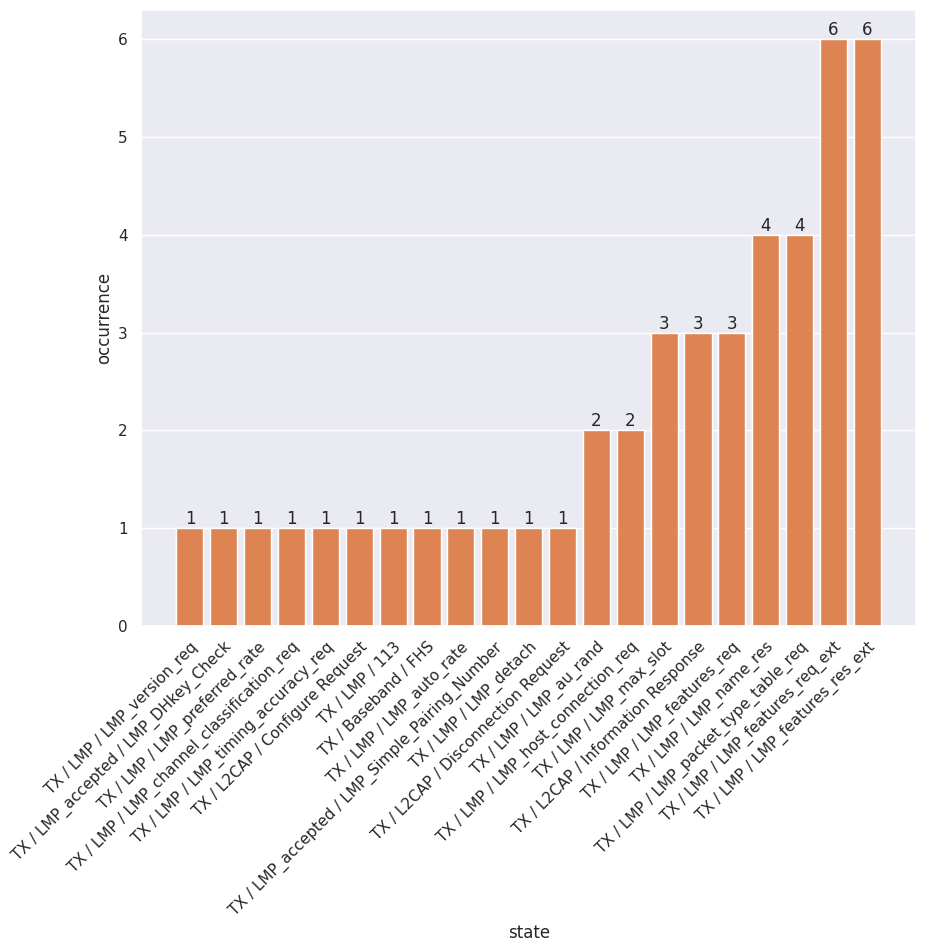

In [17]:
def merge_histograms(histograms: list[dict], common_keys=True):
    if common_keys:
        keys = histograms[0].keys()
        for histogram in histograms:
            keys = keys & histogram.keys()
    else:
        keys = set().union(*histograms)

    merged = {}
    for histogram in histograms:
        for k in keys:
            merged[k] = merged.get(k, 0) + histogram.get(k, 0)

    merged = {
        k: v
        for k, v in sorted(
            merged.items(),
            key=lambda item: item[1],
            reverse=True,
        )
    }
    return merged


def draw_histogram(histogram):
    sns.set(rc={"figure.figsize": (10, 8)})
    plt.tight_layout()
    df = pd.DataFrame(histogram.items(), columns=["state", "occurrence"])
    df = df.sort_values("occurrence", ascending=True)
    ax = sns.barplot(df, x="state", y="occurrence")
    # ax.set_ylabel("occurrence", fontsize=20)
    ax.set_xticklabels(
        ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
    )
    ax.bar_label(ax.bar(histogram.keys(), histogram.values()))
    # ax.tick_params(axis="both", which="major", labelsize=15)
    plt.show()
    plt.close()


combined_histogram = combine_histogram(capture, 2000)
for i in combined_histogram:
    i["matched_reason"] = match_existing_crash(list(i["reasons"].keys())[0])
print(combined_histogram)


crash_histograms = []
for crash in capture.crashes:
    matched_crash_reason = match_existing_crash(crash.reason)
    # if matched_crash_reason != "feature_response_flooding":
    #     # print(matched_crash_reason)
    #     pass
    if matched_crash_reason == "duplicated_iocap":
        crash_histograms.append(crash.gen_histogram(9999))
        # print(crash.pkt_loc)
        # break

print(crash_histograms[0])
merged_crash_histograms = merge_histograms(crash_histograms, False)
print(merged_crash_histograms)
draw_histogram(crash_histograms[0])

In [26]:
from utils import label_packets, packet_state
from pcapng import FileScanner
from pcapng.blocks import EnhancedPacket

capture_path = "/home/user/wdissector/modules/auto-exploiter/captures/new_ref_dup/capture_bluetooth.pcapng"

with open(capture_path, "rb") as f:
    scanner = FileScanner(f)
    try:
        count = 1
        for idx, block in enumerate(scanner):
            if not isinstance(block, EnhancedPacket):
                continue
            if packet_state(block.packet_data) == "TX / LMP_accepted / LMP_switch_req":
                print(count)
                # break
            count += 1
    except:
        pass

# frame.comment contains "Duplicated" && btbrlmp.op == 19&&frame.number>70921

382
436
525
588
600
651
1098
1155
1233
1940
1995
2073
2148
2709
2764
2840
3241
3295
3372
3443
3489
3634
3688
3767
3787
4227
4272
4285
4307
4361
4438
4891
4948
5029
5098
5283
5338
5418
5835
5896
6319
6360
6373
6451
6521
6571
6638
6652
7705
7761
7845
7916
7965
8045
8107
8124
8509
8563
8640
8718
8760
8916
8975
9055
9129
9976
10033
10110
10178
10226
10308
10378


 ** (wdissector:3938546) 08:19:27.250500 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 1325443: plugins/epan/h4bcm/packet-btbrlmp.c:3026: failed assertion "len == 15"
 ** (wdissector:3938546) 08:19:27.251160 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 1325457: plugins/epan/h4bcm/packet-btbrlmp.c:2847: failed assertion "len == 10"


10818
10871
10950
11028
11075
11152
11227
11274
11651
11708
11785
11858
11911
11990
11993
12391
12446
12528
12586
13189
13249
13329
13400
13447
13524
14436
14491
14538
14587
14630
14679
15095
15151
15227
15302
15347
15425
15871
15927
16005
16079
16129
16526
16581
16636
16661
16722
17311
17368
17448
18036
18095
18172
18247
18297
18437
18483
18500
18576
18655
18700
18732
18791
19227
19282
19361
19435
19484
19564
20221
20278
20770
20826
20846
21540
21594
21673
22532
22596
22597
22675
23150
23207
23283
23340
23355
23404
23482
23940
23998
24077
24148
24195
24251
24461
24516
24593
24673
24724
24804
24875
24929
25387
25443
25527
25977
26032
26113
26182
26238
26317
26320
26711
26770
26848
27324
27381
27452
27464
27536
27592
27673
28075
28130
28605
28660
28740
28810
28857
28996
29054
29133
29209
29255
29257
29337
29706
29760
29803
29845
29888
30226
30292
30370
30441
30475
30528
30965
31020
31083
31099
31559
31616
31693
32166
32225
32309
32382
32429
32514
32953
32989
33010
33089
33551
33610
3369

 ** (wdissector:3938546) 08:19:28.138718 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 1349461: plugins/epan/h4bcm/packet-btbrlmp.c:3426: failed assertion "len == 17"


34810
34867
34946
35022
35068
35209
35264
35344
35455
35502
35580
35757
35811
35857
35905
35949
35996
36039
36089
36958
37001
37014
37091
37166
37213
37291
37729
38176
38231
38315
38388
38435
38503
38518
39266
39325
39406
39463
39480
39527
39605
40052
40110
40186


In [ ]:
capture = Capture(
    "/home/user/wdissector/modules/auto-exploiter/captures/new_ref_mut/capture_bluetooth.pcapng",
    "bt",
    999,
    False,
)

target_crash_reason_duplicated_iocap = "Guru Meditation Error: Core  0 panic'ed (Interrupt wdt timeout on CPU0).|Backtrace:0x40082dca:0x3ffcc4c0 0x400fd74d:0x3ffcc4e0 0x40019fb5:0x3ffcc500 0x400208ed:0x3ffcc530 0x4002c9fa:0x3ffcc550 0x40101311:0x3ffcc590 0x4001a637:0x3ffcc5b0 0x40019d11:0x3ffcc5e0 0x40055b4d:0x3ffcc600 0x400fdb3b:0x3ffcc620 0x400fe0fd:0x3ffcc640 0x4009140d:0x3ffcc670|Backtrace:0x4013205f:0x3ffbc470 0x400d38eb:0x3ffbc490 0x400927a5:0x3ffbc4b0 0x4009140d:0x3ffbc4d0"
target_crash_reason_nothing = "Guru Meditation Error: Core  0 panic'ed (LoadProhibited). Exception was unhandled.|Backtrace:0x40028dcc:0x3ffcc160 0x4001a637:0x3ffcc1a0 0x40019d11:0x3ffcc1d0 0x40055b4d:0x3ffcc1f0 0x400fdb3b:0x3ffcc210 0x400fe0fd:0x3ffcc230 0x4009140d:0x3ffcc260"
print(len(capture.crashes))
print(combine_histogram(capture, 2000, False))

# for crash in capture.crashes:
#     if is_same_crash(crash["reason"], target_crash_reason_nothing):
#         # print(crash["histogram"])
#         df = pd.DataFrame(crash["histogram"].items(), columns=["state", "occurrence"])
#         df = df.sort_values("occurrence", ascending=True)
#         # df = df[:8]
#         ax = sns.barplot(df, x="state", y="occurrence")
#         # fig_name = f"{i}, crash type {crash_types[ list(j["reasons"].keys())[0] ]}, all states"
#         # ax.set_xlabel(fig_name, fontsize=20)
#         ax.set_ylabel("occurrence", fontsize=20)
#         ax.set_xticklabels(
#             ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
#         )
#         ax.tick_params(axis="both", which="major", labelsize=12)
#         plt.show()
#         plt.tight_layout()
#         # plt.savefig(f'plots/{fig_name}.png', dpi=150)
#         plt.close()

# df = pd.DataFrame(
#     {
#         "TX / LMP / LMP_features_req_ext": 10,
#         "TX / LMP_accepted / LMP_encapsulated_payload": 4,
#         "TX / LMP / LMP_detach": 4,
#     }.items(),
#     columns=["state", "occurrence"],
# )
# df = df.sort_values("occurrence", ascending=True)
# # df = df[:8]
# ax = sns.barplot(df, x="state", y="occurrence")
# # fig_name = f"{i}, crash type {crash_types[ list(j["reasons"].keys())[0] ]}, all states"
# # ax.set_xlabel(fig_name, fontsize=20)
# ax.set_ylabel("occurrence", fontsize=20)
# ax.set_xticklabels(
#     ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
# )
# ax.tick_params(axis="both", which="major", labelsize=15)
# plt.show()
# plt.tight_layout()
# # plt.savefig(f'plots/{fig_name}.png', dpi=150)
# plt.close()

 ** (wdissector:2538641) 07:45:17.757676 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 1060701: plugins/epan/h4bcm/packet-btbrlmp.c:2787: failed assertion "len == 2"
 ** (wdissector:2538641) 07:45:17.759744 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 1060747: plugins/epan/h4bcm/packet-btbrlmp.c:2678: failed assertion "len == 17"
 ** (wdissector:2538641) 07:45:17.761747 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 1060786: plugins/epan/h4bcm/packet-btbrlmp.c:3390: failed assertion "len == 16"
 ** (wdissector:2538641) 07:45:17.763099 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 1060817: plugins/epan/h4bcm/packet-btbrlmp.c:3528: failed assertion "len == 3"
 ** (wdissector:2538641) 07:45:17.781785 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 1061238: plugins/epan/h4bcm/packet-btbrlmp.c:2954: failed assertion "tvb_reported_length_remaining(tvb, offset) >= 1"
 ** (wdissector:2538641) 07:45:17.

143
[{'reasons': {"Guru Meditation Error: Core  0 panic'ed (Interrupt wdt timeout on CPU0).|Backtrace:0x40082dcf:0x3ffcc080 0x400fd74d:0x3ffcc0a0 0x40019fb5:0x3ffcc0c0 0x40034e06:0x3ffcc0f0 0x4001cc6f:0x3ffcc120 0x40052eff:0x3ffcc160 0x4001a637:0x3ffcc1a0 0x40019d11:0x3ffcc1d0 0x40055b4d:0x3ffcc1f0 0x400fdb3b:0x3ffcc210 0x400fe0fd:0x3ffcc230 0x4009140d:0x3ffcc260|Backtrace:0x4013205f:0x3ffbc470 0x400d38eb:0x3ffbc490 0x400927a5:0x3ffbc4b0 0x4009140d:0x3ffbc4d0": 1, "Guru Meditation Error: Core  0 panic'ed (Interrupt wdt timeout on CPU0).|Backtrace:0x40082dca:0x3ffcc490 0x400fd74d:0x3ffcc4b0 0x40019fb5:0x3ffcc4d0 0x40034e06:0x3ffcc500 0x4001cc6f:0x3ffcc530 0x40052eff:0x3ffcc570 0x4001a637:0x3ffcc5b0 0x40019d11:0x3ffcc5e0 0x40055b4d:0x3ffcc600 0x400fdb3b:0x3ffcc620 0x400fe0fd:0x3ffcc640 0x4009140d:0x3ffcc670|Backtrace:0x4013205f:0x3ffbc470 0x400d38eb:0x3ffbc490 0x400927a5:0x3ffbc4b0 0x4009140d:0x3ffbc4d0": 6, "Guru Meditation Error: Core  0 panic'ed (Interrupt wdt timeout on CPU0).|Backtr

In [ ]:

# generate overall crash types
crash_types = {}
next_type = 1
for i in ["dup", "mut", "evo", "all"]:
    capture_path = f"/home/user/wdissector/bindings/python/captures/bluetooth_esp32/{i}/capture_bluetooth.pcapng"
    # capture_path = "/home/user/wdissector/modules/auto-exploiter/captures/bt_new_ref/capture_bluetooth_new_ref.pcapng"
    capture = Capture(capture_path, "bt", max_iterations=999, use_cache=True)
    analyze_capture(capture)
    for crash in capture.crashes:
        reason = crash["reason"]
        for crash_type in crash_types:
            if is_same_crash(crash_type, reason):
                crash_types[reason] = crash_types[crash_type]
                break
        else:
            crash_types[reason] = next_type
            next_type += 1


sns.set(rc={"figure.figsize": (20, 15)})
for i in ["dup", "mut", "evo", "all"]:
    capture_path = f"/home/user/wdissector/bindings/python/captures/bluetooth_esp32/{i}/capture_bluetooth.pcapng"
    # capture_path = "/home/user/wdissector/modules/auto-exploiter/captures/bt_new_ref/capture_bluetooth_new_ref.pcapng"
    capture = Capture(capture_path, "bt", max_iterations=999, use_cache=True)
    combined_histogram = combine_histogram(capture, 2000, False)
    print(combined_histogram)
    for j in combined_histogram:
        df = pd.DataFrame(j["histogram"].items(), columns=["state", "occurrence"])
        df = df.sort_values("occurrence", ascending=True)
        df = df[:8]
        ax = sns.barplot(df, x="state", y="occurrence")
        fig_name = f"{i}, crash type {crash_types[ list(j["reasons"].keys())[0] ]}, all states"
        ax.set_xlabel(fig_name, fontsize=20)
        ax.set_ylabel("occurrence", fontsize=20)
        ax.set_xticklabels(
            ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
        )
        ax.tick_params(axis='both', which='major', labelsize=15)
        # plt.show()
        plt.tight_layout()
        plt.savefig(f'plots/{fig_name}.png', dpi=150)
        plt.close()
    #     break
    # break

In [ ]:
import json

with open("./existing_crashes.json", "r", encoding="utf8") as f:
    existing_crashes = json.load(f)

In [ ]:
# unique_reasons = set()
# for crash in crashes:
#     unique_reasons.add(crash["reason"])

# duplicated_iocap_crash = "Guru Meditation Error: Core  0 panic'ed (Interrupt wdt timeout on CPU0).|Backtrace:0x40082dcf:0x3ffcc0a0 0x400fd74d:0x3ffcc0c0 0x40019fb5:0x3ffcc0e0 0x400208ed:0x3ffcc110 0x4002c9fa:0x3ffcc130 0x40101311:0x3ffcc170 0x4001a637:0x3ffcc190 0x40019d11:0x3ffcc1c0 0x40055b4d:0x3ffcc1e0 0x400fdb3b:0x3ffcc200 0x400fe0fd:0x3ffcc220 0x4009140d:0x3ffcc250|Backtrace:0x4013205f:0x3ffbc470 0x400d38eb:0x3ffbc490 0x400927a5:0x3ffbc4b0 0x4009140d:0x3ffbc4d0"
# feature_response_flooding_crash = "Guru Meditation Error: Core  0 panic'ed (LoadProhibited). Exception was unhandled.|Backtrace:0x40028dcc:0x3ffcc150 0x4001a637:0x3ffcc190 0x40019d11:0x3ffcc1c0 0x40055b4d:0x3ffcc1e0 0x400fdb3b:0x3ffcc200 0x400fe0fd:0x3ffcc220 0x4009140d:0x3ffcc250"
# wrong_encapsulated_payload_crash = "Guru Meditation Error: Core  0 panic'ed (LoadProhibited). Exception was unhandled.|Backtrace:0x40028dcc:0x3ffcc560 0x4001a637:0x3ffcc5a0 0x40019d11:0x3ffcc5d0 0x40055b4d:0x3ffcc5f0 0x400fdb3b:0x3ffcc610 0x400fe0fd:0x3ffcc630 0x4009140d:0x3ffcc660|Backtrace:0x40028dcc:0x3ffcc150 0x4001a637:0x3ffcc190 0x40019d11:0x3ffcc1c0 0x40055b4d:0x3ffcc1e0 0x400fdb3b:0x3ffcc200 0x400fe0fd:0x3ffcc220 0x4009140d:0x3ffcc250"
# feature_req_ping_pong = "Guru Meditation Error: Core  0 panic'ed (LoadProhibited). Exception was unhandled.|Backtrace:0x40028dcc:0x3ffcc560 0x4001a637:0x3ffcc5a0 0x40019d11:0x3ffcc5d0 0x40055b4d:0x3ffcc5f0 0x400fdb3b:0x3ffcc610 0x400fe0fd:0x3ffcc630 0x4009140d:0x3ffcc660"

# second_hex_threshold = 10
# for crash_id in unique_reasons:
#     # print(crash_id)
#     print(
#         is_same_crash(duplicated_iocap_crash, crash_id, second_hex_threshold), crash_id
#     )
#     print(
#         is_same_crash(feature_response_flooding_crash, crash_id, second_hex_threshold),
#         crash_id,
#     )
#     print(
#         is_same_crash(wrong_encapsulated_payload_crash, crash_id, second_hex_threshold),
#         crash_id,
#     )
#     print(
#         is_same_crash(feature_req_ping_pong, crash_id, second_hex_threshold), crash_id
#     )


def test_1():
    threshold = 10
    c1 = "xx guru|Backtrace:0x40082dcf:0x3ffcc0a0 0x40019fb5:0x3ffcc0e0 0x40082dcf:0x3ffcc0a0"

    # first value in first hex different
    c2 = "xx guru|Backtrace:0x40082dce:0x3ffcc0a0 0x40019fb5:0x3ffcc0e0 0x40082dcf:0x3ffcc0a0"

    # all second values shift with same distance 1
    c3 = "xx guru|Backtrace:0x40082dcf:0x3ffcc0a1 0x40019fb5:0x3ffcc0e1 0x40082dcf:0x3ffcc0a1"

    # all second values shift with same distance 0x11
    c4 = "xx guru|Backtrace:0x40082dcf:0x3ffcc0b1 0x40019fb5:0x3ffcc0f1 0x40082dcf:0x3ffcc0b1"

    assert is_same_crash(c1, c1, threshold)
    assert is_same_crash(c1, c2, threshold)
    assert is_same_crash(c1, c3, threshold)
    assert not is_same_crash(c1, c4, threshold)


# test_1()

In [ ]:
# analyze crash distribution

dup_capture_path = "/home/user/wdissector/bindings/python/captures/bluetooth_esp32/dup/capture_bluetooth.pcapng"
mut_capture_path = "/home/user/wdissector/bindings/python/captures/bluetooth_esp32/mut/capture_bluetooth.pcapng"
evo_capture_path = "/home/user/wdissector/bindings/python/captures/bluetooth_esp32/evo/capture_bluetooth.pcapng"
all_capture_path = "/home/user/wdissector/bindings/python/captures/bluetooth_esp32/all/capture_bluetooth.pcapng"

# dup_capture = Capture(dup_capture_path, "bt", max_iterations=999, use_cache=False)
# mut_capture = Capture(mut_capture_path, "bt", max_iterations=999, use_cache=False)
# evo_capture = Capture(evo_capture_path, "bt", max_iterations=999, use_cache=False)
# all_capture = Capture(all_capture_path, "bt", max_iterations=999, use_cache=False)



--------------------- State Machine ---------------------
[Machine] Global Config Loaded: global_config.json
[Machine] Final Config Loaded: /home/user/wdissector/configs/bt_config.json
Disabling Core dump for this process: ulimit -c 0
WDissector Lib (Wireshark) 4.1.0 (v4.1.0rc0-673-g3baf3216acca)
Profile "WDissector" loaded
[Machine] Mapping Rules loaded: 9
[Machine] --> "btsdp"
[Machine] --> "bta2dp"
[Machine] --> "btavrcp"
[Machine] --> "btavdtp"
[Machine] --> "btrfcomm"
[Machine] --> "btl2cap"
[Machine] --> "btbrlmp.op == 3"
[Machine] --> "esp32_btlmp"
[Machine] --> "fhs"
[Machine] Exclusion Rules loaded: 4
[Machine] Event loop started
[Machine] Global Config Loaded: global_config.json
[Machine] Final Config Loaded: /home/user/wdissector/bindings/python/configs/bt_config.json
WDissector Lib (Wireshark) 4.1.0 (v4.1.0rc0-673-g3baf3216acca)
Profile "WDissector" loaded
[Machine] Mapping Rules loaded: 9
[Machine] --> "btsdp"
[Machine] --> "bta2dp"
[Machine] --> "btavrcp"
[Machine] --> 

In [ ]:
from pprint import pprint


new_ref_capture = Capture("logs/capture_bluetooth_new_ref.pcapng", "bt", 999)
new_ref_capture_combined_histogram = combine_histogram(new_ref_capture, 10)
# pprint(new_ref_capture_combined_histogram)
new_ref_capture.crashes

[{'fuzzed_pkts': [{'pkt': <capture_process.PicklableEnhancedPacket at 0x7fbd5c32e420>,
    'pkt_loc': 26,
    'iteration': 1,
    'prev_pkt': <capture_process.PicklableEnhancedPacket at 0x7fbd5c32e120>,
    'scanner_loc': 27,
    'state': 'TX / LMP / LMP_not_accepted_ext'},
   {'pkt': <capture_process.PicklableEnhancedPacket at 0x7fbd5c32f620>,
    'pkt_loc': 65,
    'iteration': 1,
    'prev_pkt': <capture_process.PicklableEnhancedPacket at 0x7fbd5c32f890>,
    'scanner_loc': 66,
    'state': 'TX / LMP / LMP_version_req'},
   {'pkt': <capture_process.PicklableEnhancedPacket at 0x7fbd5c32d970>,
    'pkt_loc': 79,
    'iteration': 1,
    'prev_pkt': <capture_process.PicklableEnhancedPacket at 0x7fbd5c32fbf0>,
    'scanner_loc': 80,
    'state': 'TX / LMP / 93'},
   {'pkt': <capture_process.PicklableEnhancedPacket at 0x7fbd5c32ecc0>,
    'pkt_loc': 86,
    'iteration': 1,
    'prev_pkt': <capture_process.PicklableEnhancedPacket at 0x7fbd5c32d220>,
    'scanner_loc': 87,
    'state': 'TX 

In [ ]:
temp = Capture(all_capture_path, "bt", 10, False)
temp.crashes = (
    all_capture.crashes
    + dup_capture.crashes
    + evo_capture.crashes
    + mut_capture.crashes
)

for cap in [all_capture, dup_capture, evo_capture, mut_capture, temp]:
    print("Total crashes:", len(cap.crashes))
    combined = combine_histogram(cap, 10)
    print("Different crashes:", len(combined), "\n")

 ** (wdissector:2692401) 03:04:28.528232 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 375994: plugins/epan/h4bcm/packet-btbrlmp.c:3138: failed assertion "len == 2"
 ** (wdissector:2692401) 03:04:28.535410 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 376074: plugins/epan/h4bcm/packet-btbrlmp.c:3418: failed assertion "len == 17"
 ** (wdissector:2692401) 03:04:28.566131 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 376468: plugins/epan/h4bcm/packet-btbrlmp.c:2731: failed assertion "len == 17"
 ** (wdissector:2692401) 03:04:28.566640 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 376477: plugins/epan/h4bcm/packet-btbrlmp.c:3180: failed assertion "len == 9"
 ** (wdissector:2692401) 03:04:28.576515 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 376698: plugins/epan/h4bcm/packet-btbrlmp.c:2763: failed assertion "len == 5"
 ** (wdissector:2692401) 03:04:28.580574 [Epan WARNING] -- Dissector bug, prot

Total crashes: 14
Different crashes: 6 

Total crashes: 109
Different crashes: 10 

Total crashes: 35
Different crashes: 17 

Total crashes: 32
Different crashes: 11 

Total crashes: 190
Different crashes: 25 



 ** (wdissector:2692401) 03:04:29.647622 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 395881: plugins/epan/h4bcm/packet-btbrlmp.c:3528: failed assertion "len == 3"
 ** (wdissector:2692401) 03:04:29.651744 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 395982: plugins/epan/h4bcm/packet-btbrlmp.c:3313: failed assertion "len == 3"
 ** (wdissector:2692401) 03:04:29.658777 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 396148: plugins/epan/h4bcm/packet-btbrlmp.c:2747: failed assertion "len == 17"
 ** (wdissector:2692401) 03:04:29.663054 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 396253: plugins/epan/h4bcm/packet-btbrlmp.c:3404: failed assertion "len == 4"
 ** (wdissector:2692401) 03:04:29.664439 [Epan WARNING] -- Dissector bug, protocol esp32_btlmp, in packet 396286: plugins/epan/h4bcm/packet-btbrlmp.c:3198: failed assertion "len == 4"


In [ ]:
len(mut_capture_combined_histogram)

11

/tmp/ipykernel_2425254/1878613094.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_2425254/1878613094.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_2425254/1878613094.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_2425254/1878613094.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_2425254/1878613094.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_2425254/1878613094.py:16: User

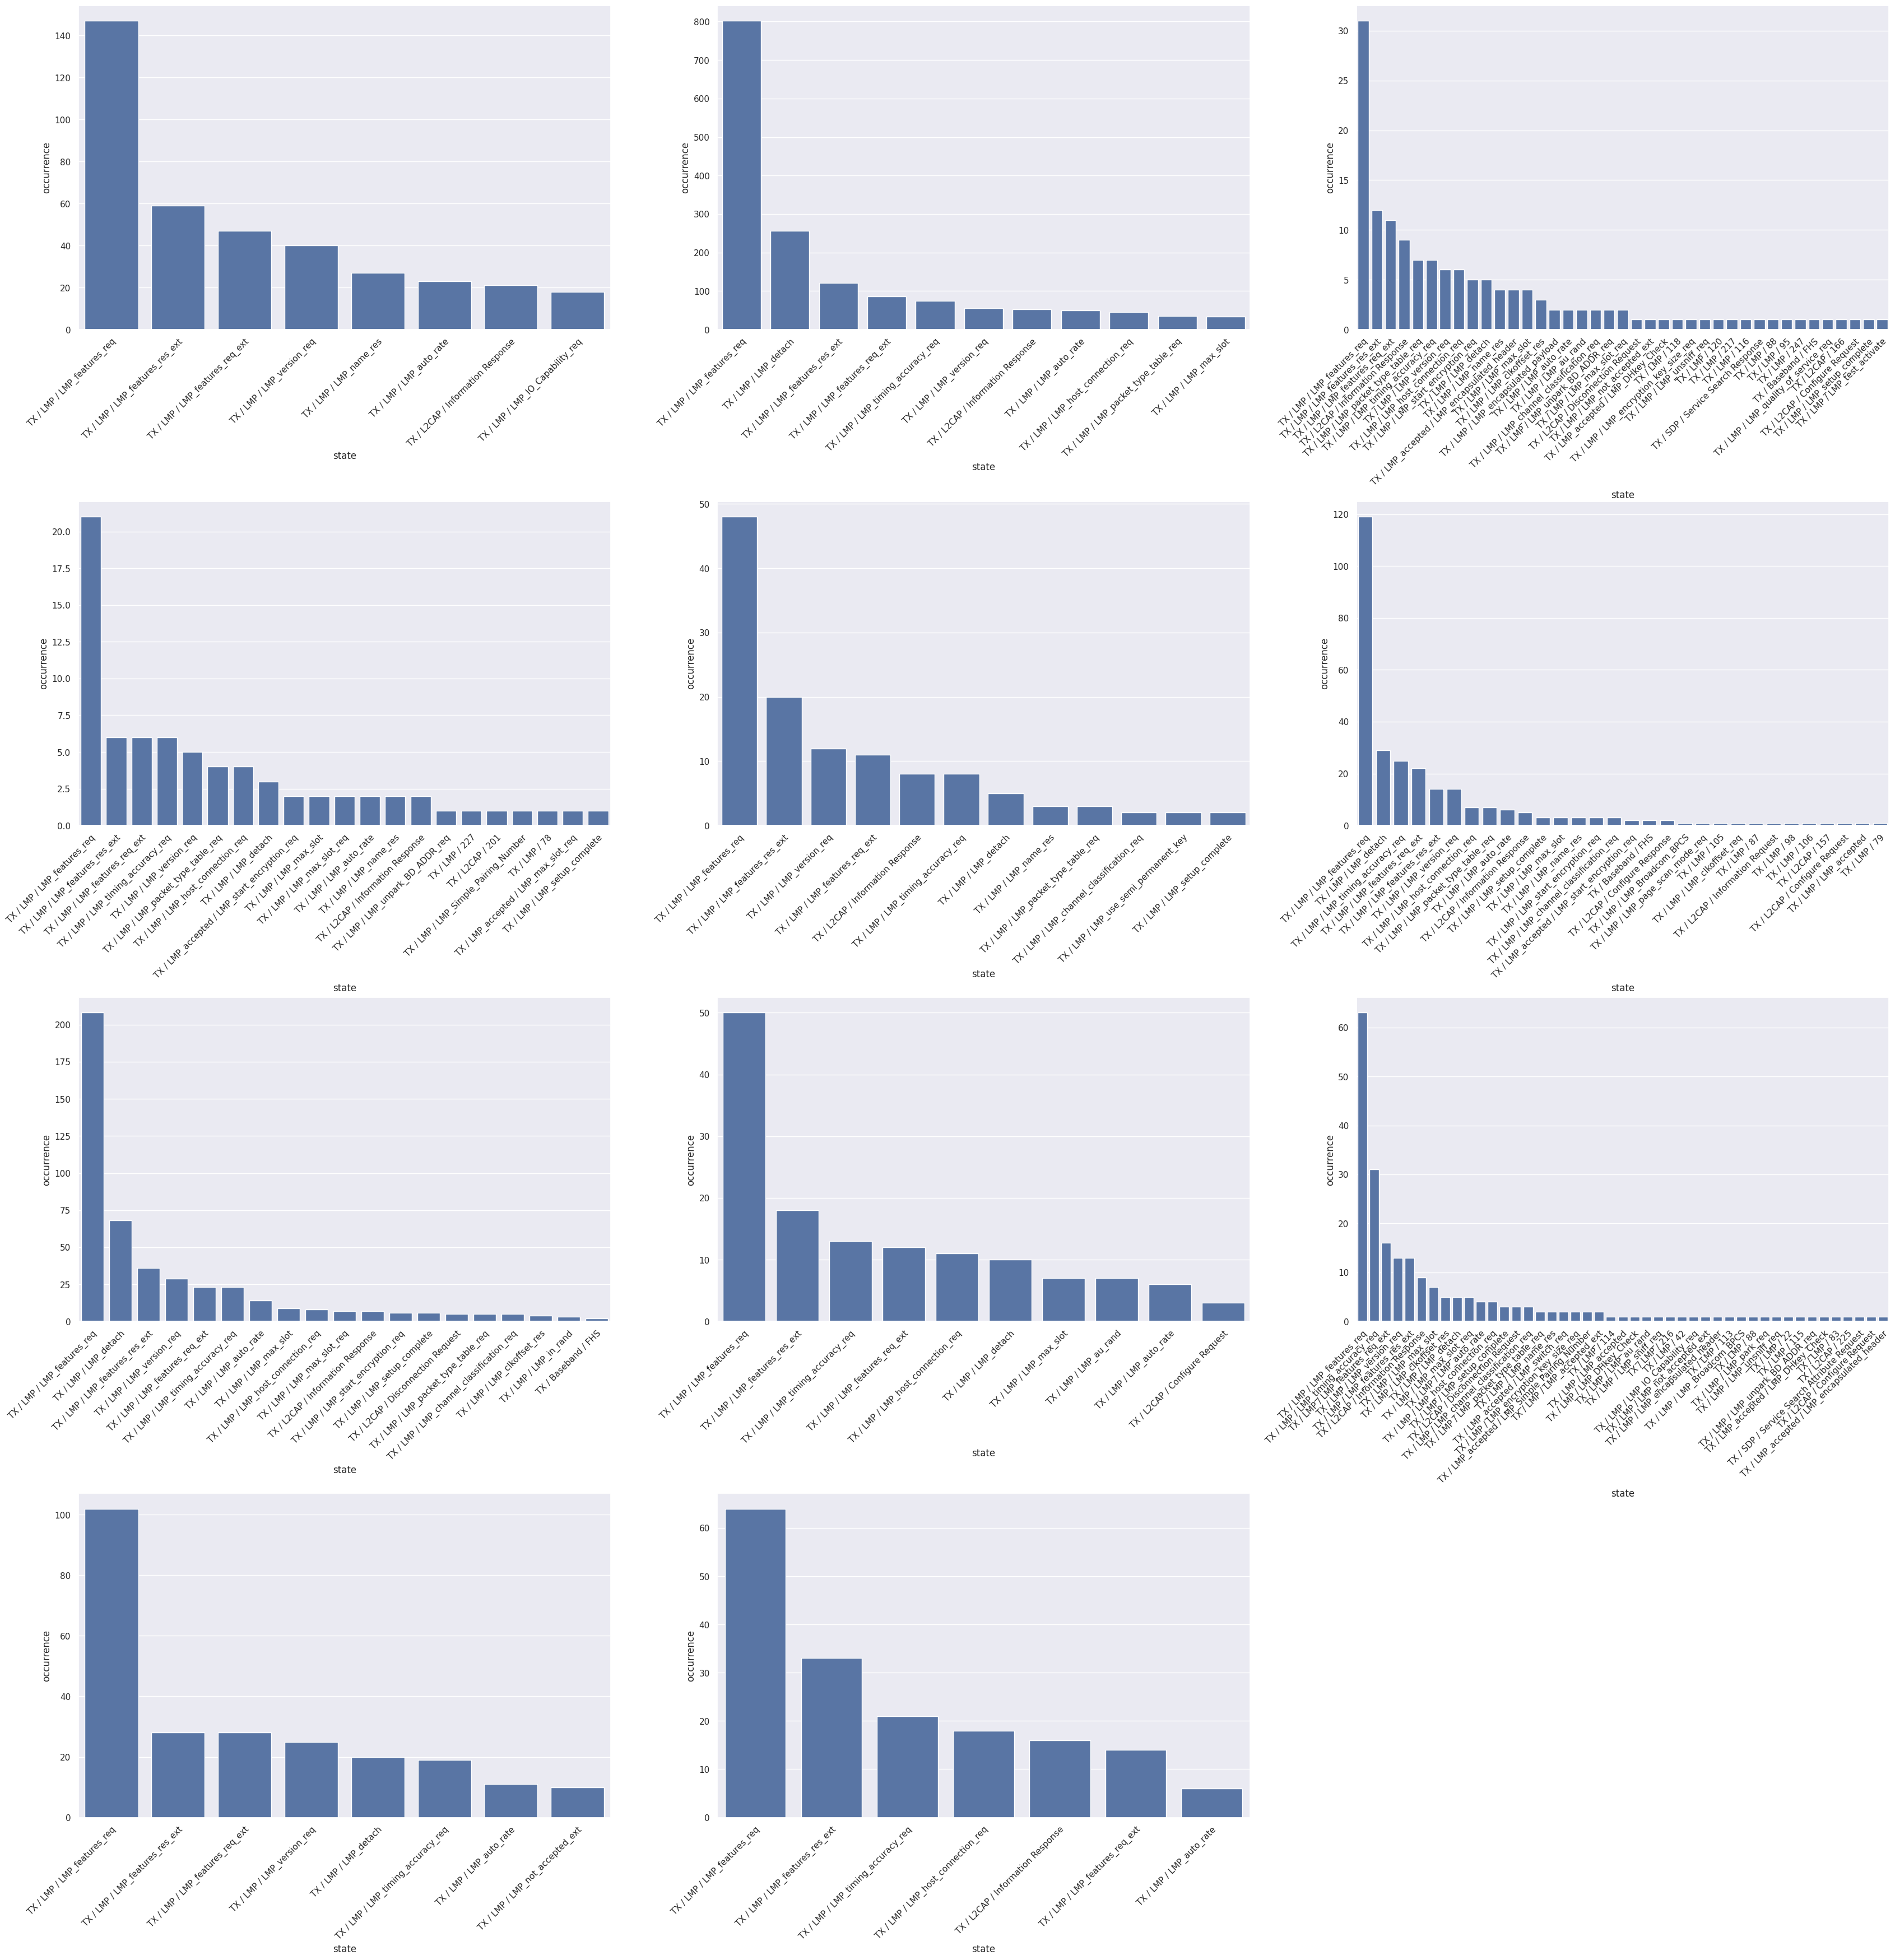

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize": (41.7, 42.0)})

fig, axes = plt.subplots(4, 3)
# fig.tight_layout()
plt.subplots_adjust(hspace=0.53)

for idx, i in enumerate(mut_capture_combined_histogram):
    df = pd.DataFrame(i["histogram"].items(), columns=["state", "occurrence"])
    df = df.sort_values("occurrence", ascending=False)
    ax = sns.barplot(df, x="state", y="occurrence", ax=axes[idx // 3, idx % 3])
    ax.set_xticklabels(
        ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
    )
plt.delaxes(axes[3, 2])
# g = sns.catplot(df, kind="bar", x="state", y="occurrence", col="reasons")
# for ax in g.axes.flat:
#     ax.set_xticklabels(
#         ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
#     )
# plt.xticks(rotation=50, horizontalalignment="right")